# Data Analysis - Sales Prediction for Big Mart Outlets

## 1) Business problem

URL Project: [Sales Prediction for Big Mart Outlets](https://www.kaggle.com/datasets/shivan118/big-mart-sales-prediction-datasets?select=test.csv)

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

**Data Dictionary**

We have a train (8523) and test (5681) data set, the train data set has both input and output variable(s). You need to predict the sales for the test data set.

#### Train file:
CSV containing the item outlet information with a sales value

**Variable Description**
* *Item_Identifier*: Unique product ID
* *Item_Weight*: Weight of product
* *Item_Fat_Content*: Whether the product is low fat or not
* *Item_Visibility*: The % of the total display area of all products in a store allocated to the particular product
* *Item_Type*: The category to which the product belongs
* *Item_MRP*: Maximum Retail Price (list price) of the product
* *Outlet_Identifier*: Unique store ID
* *Outlet_Establishment_Year*: The year in which the store was established
* *Outlet_Size*: The size of the store in terms of ground area covered
* *Outlet_Location_Type*: The type of city in which the store is located
* *Outlet_Type*: Whether the outlet is just a grocery store or some sort of supermarket
* *Item_Outlet_Sales*: sales of the product in t particular store. This is the outcome variable to be predicted.

### Test file:
CSV containing item outlet combinations for which sales need to be forecasted

**Variable Description**
* *Item_Identifier*:  Unique product ID
* *Item_Weight*: Weight of product
* *Item_Fat_Content*:  Whether the product is low fat or not
* *Item_Visibility*: The % of the total display area of all products in a store allocated to the particular product
* *Item_Type*: The category to which the product belongs
* *Item_MRP*:  Maximum Retail Price (list price) of the product
* *Outlet_Identifier*:  Unique store ID
* *Outlet_Establishment_Year*:  The year in which store store was established
* *Outlet_Size*:  The size of the store in terms of ground area covered
* *Outlet_Location_Type*: The type of city in which the store is located
* *Outlet_Type*: whether the outlet is just a grocery store or some sort of supermarket

### Submission file format
**Variable Description**
* *Item_Identifier*:  Unique product ID
* *Outlet_Identifier*:  Unique store ID
* *Item_Outlet_Sales*:  Sales of the product in t particular store. This is the outcome variable to be predicted.

**Evaluation Metric**

Your model performance will be evaluated on the basis of your prediction of the sales for the test data (test.csv), which contains similar data-points as train except for the sales to be predicted. Your submission needs to be in the format as shown in the same sample submission.

We at our end, have the actual sales for the test dataset, against which your predictions will be evaluated. We will use the Root Mean Square Error value to judge your response.

### 1.1) Imports and Load Data

In [1]:
import pandas as pd
import numpy as np

from scipy.stats import normaltest, zscore
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import missingno


import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid", {"axes.facecolor": ".95"})
sns.set_context("paper")

### 1.2) Utilities Functions

In [2]:
def currencyFormatting(value):
    if value / 1000000 > 1:
        return f'$ {str(round(value/1000000, 2))}M'
    elif value / 100000 > 1:
        return f'$ {str(round(value/100000, 2))}KK'
    elif value / 1000 > 1:
        return f'$ {str(round(value/10000, 2))}k'
    else: 
        return f'$ {str(round(value, 2))}'

In [3]:
def resumeNumber(value):
    if value / 1000000 > 1:
        return f'{str(round(value/1000000, 2))}M'
    elif value / 100000 > 1:
        return f'{str(round(value/100000, 2))}KK'
    elif value / 1000 > 1:
        return f'{str(round(value/10000, 2))}k'
    else: 
        return f'{str(round(value, 2))}'

## 2) EDA - Exploratory Data Analysis

In [4]:
df_train_raw = pd.read_csv('../data/train.csv')
df_test_raw = pd.read_csv('../data/test.csv')

In [5]:
display(df_train_raw.shape)
display(df_train_raw.head())

(8523, 12)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
display(df_test_raw.shape)
display(df_test_raw.head())

(5681, 11)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Observações:
* O dataframe é bem leve, eliminando a necessidade de qualquer tratamento de performance ou uso de frameworks mais robustos;
* Há apenas duas variáveis com valores missing;
* Temos 4 atributos float, 1 int e 7 strings;

In [8]:
df_train_raw.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Observações:

**Item_Weight**
* Temos 7060 registos, há dados missing.
* A média e a mediana(50%) estão bem próximas, indicando que a distribuição dos dados pode ser simétrica (Isso não é regra);
* O menor valor é 4.5 e o maior é 21.3. Isto é, um intervalo pequeno de dados. Além disso a diferença de um percentil para o seguinte é baixa, indicando que a quantidade de dados em cada intervalo é bem próxima.
* E que possivelmente não há outliers nesse atributo. 

**Item_Visibility**
* Não há dados missing
* A média e a mediana não são tão próximos. Ao contrário do atributo anterior, isto pode indicar uma assimetria nos dados.
* Há itens que sequer são visualizados na loja e itens que são muito visualizados nas lojas. Intuitivamente falando, esse atributo parece ser extremamente relevante para as vendas.

**Item_MRP**
* Não há dados missing.
* A diferença entre o menor preço e o maior preço é baixa, considerando que são dados de uma loja de varejo, onde os preços costumam ter bastante amplitude.
* A média e a mediana são próximas com uma leve diferença, indicando uma leve assimetria nos dados.

**Outlet_Establishment_Year**
* Não há dados missing
* O ano da primeira loja foi 1985, o ano da última loja até o momento foi 2009. Será que isso impacta na venda das lojas?

**Item_Outlet_Sales**
* A variação de vendas nas lojas é bastante alta. O que é esperado, já que os produtos têm demandas diferentes entre si e em lojas diferentes.


### 2.1) Variable: Item_Weight (numerical)

Skewness : 0.082
Kurtosis : -1.228


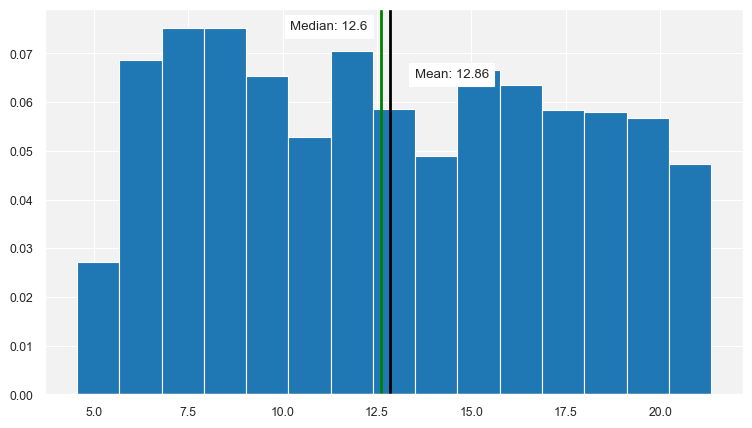

In [9]:
skewness = round(df_train_raw['Item_Weight'].skew(), 3)
kurtosis = round(df_train_raw['Item_Weight'].kurt(), 3)
mean = round(df_train_raw['Item_Weight'].mean(), 2)
median = round(df_train_raw['Item_Weight'].median(), 2)

print(f'Skewness : {skewness}')
print(f'Kurtosis : {kurtosis}')

fig, ax = plt.subplots(figsize=(9, 5))
ax.hist(df_train_raw['Item_Weight'], bins=15, density=True)

# Linha da mediana
ax.axvline(x = df_train_raw['Item_Weight'].mean(), color='black', lw=2)
ax.text(13.5, 0.065, f'Mean: {mean}', bbox={'facecolor':'white'})

# Linha da média
ax.axvline(x = df_train_raw['Item_Weight'].median(), color='green', lw=2)
ax.text(10.2, 0.075, f'Median: {median}', bbox={'facecolor':'white'})

plt.show()

Observações:

**Skewness**:

Descreve a distribuição de um conjunto de dados em relação à sua média. Ela pode ser:
* Uma assimetria positiva (ou à direita): Significa que a cauda do lado direito é mais longa ou mais espessa do que a do lado esquerdo.
* Uma assimetria negativa (ou à esquerda): Significa que a cauda do lado esquerdo é mais longa ou mais espessa do que a do lado direito.
* Uma assimetria zero: Sugere que os valores são relativamente igualmente distribuídos em ambos os lados da média.

> Nesse caso, nota-se que o skewness `0.082` é bastante próximo de zero, levemente positivo, o que indica uma assimétrica quase zero e com uma leve cauda à direita, que pode se confirmar visualizando o gráfico.

---
**Kurtosis**

É uma medida estatística que descreve o "achatamento" de uma distribuição de probabilidade em relação à distribuição normal. Ela indica o peso das caudas e o pico da distribuição.

* Uma curtose positiva (ou leptocúrtica) significa que a distribuição tem caudas mais pesadas (mais valores extremos) e um pico mais agudo em comparação com a distribuição normal. Isso indica uma maior ocorrência de valores extremos.
* Uma curtose negativa (ou platicúrtica) significa que a distribuição tem caudas mais leves (menos valores extremos) e um pico mais achatado em comparação com a distribuição normal. Isso indica uma menor ocorrência de valores extremos.
* Uma curtose zero sugere que a distribuição tem a mesma curtose que a distribuição normal, ou seja, tem a mesma proporção de valores extremos.

> Nesse caso temos a kurtosis de `-1.228`, que mostra que a nossa distribuição é platicúrtica.

---

**Distribuição Normal**

Em Estatística, a distribuição normal é uma das distribuições de probabilidade mais utilizadas para modelar fenômenos naturais. Isso se deve ao fato de que um grande número de fenômenos naturais apresenta sua distribuição de probabilidade tão proximamente normal, que a ela pode ser com sucesso referida, e, portanto, com adequado acerto por ela representada como se normal fosse.

A distribuição normal, também conhecida como distribuição gaussiana, é uma curva simétrica em torno do seu ponto médio, apresentando assim seu famoso formato de sino.

Uma distribuição estatística é uma função que define uma curva, e a área sob essa curva determina a probabilidade de ocorrer o evento por ela correlacionado.

E o que é distribuição normal? É a mais importante dentre as distribuições estatísticas.

A curva de distribuição normal representa o comportamento de diversos processos nas empresas e muitos fenômenos comuns, como por exemplo, altura ou peso de uma população, a pressão sanguínea de um grupo de pessoas, o tempo que um grupo de estudantes gasta para realizar uma prova.

A distribuição normal pode ser usada para aproximar distribuições discretas de probabilidade, como por exemplo a distribuição binomial. Além disso, a distribuição normal serve também como base para a inferência estatística clássica.

Nela, a média, mediana e moda dos dados possuem o mesmo valor.

> Nesse caso, a média e a mediana não estão no centro, indicando que a distribuição não é simétrica. Além disso, as barras do histograma são mais altas no meio e diminuem em altura à medida que se afastam para os lados, o que também sugere uma distribuição não normal.

In [10]:
stats, pval = normaltest(df_train_raw['Item_Weight'])

# Checar valor-p
if pval > 0.05:
    
    print(f'Item_Weight : Distribuição Normal. Valor-p {pval}')
else:
    print(f'Item_Weight : Distribuição Não Normal. Valor-p {pval}')

Item_Weight : Distribuição Não Normal. Valor-p nan


Chegando através da função normaltest do scipy.stats concluímos que a distribuição não é normal.

---

**Boxplot**

<Axes: >

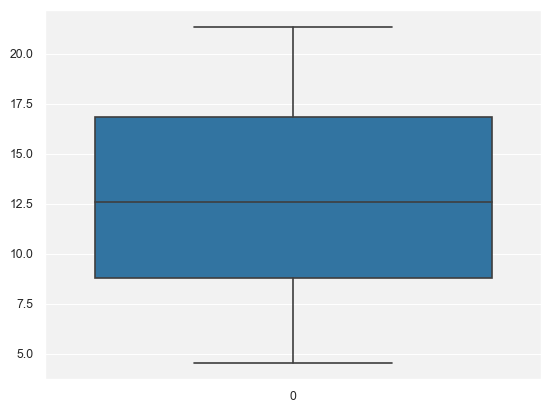

In [11]:
sns.boxplot(df_train_raw['Item_Weight'])

Um boxplot, também conhecido como diagrama de caixa, é um tipo de gráfico usado para ilustrar a distribuição de um conjunto de dados. Ele fornece uma boa indicação de como os valores estão distribuídos. O boxplot é formado por cinco números principais: mínimo, primeiro quartil (Q1), mediana (ou segundo quartil, Q2), terceiro quartil (Q3) e máximo.

Aqui está uma descrição mais detalhada de cada componente de um boxplot:

* *Mínimo*: É o valor mínimo do conjunto de dados, mas que respeita um certo limite. É possível a existência de valores discrepantes que são ainda menores (outliers).
* *Primeiro Quartil (Q1)*: É a base da caixa retangular. Uma demarcação que distingue que 25% dos dados estão abaixo e os outros 75% dos dados estão acima desse valor.
* *Mediana ou Segundo Quartil (Q2)*: A linha mais ao centro do gráfico, demarcar o valor central do conjunto de dados. 50% dos dados são maiores que esse valor e os outros 50% dos dados são menores.
* *Terceiro Quartil (Q3)*: O topo da caixa retangular. Essa linha informa o número que fica entre os 75% valores mais baixos e os 25% valores mais altos.
* *Máximo*: Valor máximo do conjunto de dados, mas respeitando um limite calculado. É possível a existência de valores acima deste na base de dados (outliers).

> Podemos confirmar que os dados estão bem distribuídos entre os quartis e não há outliers nesse dataset.

### 2.2) Item Visibility (numerical)

Skewness : 1.167
Kurtosis : 1.679


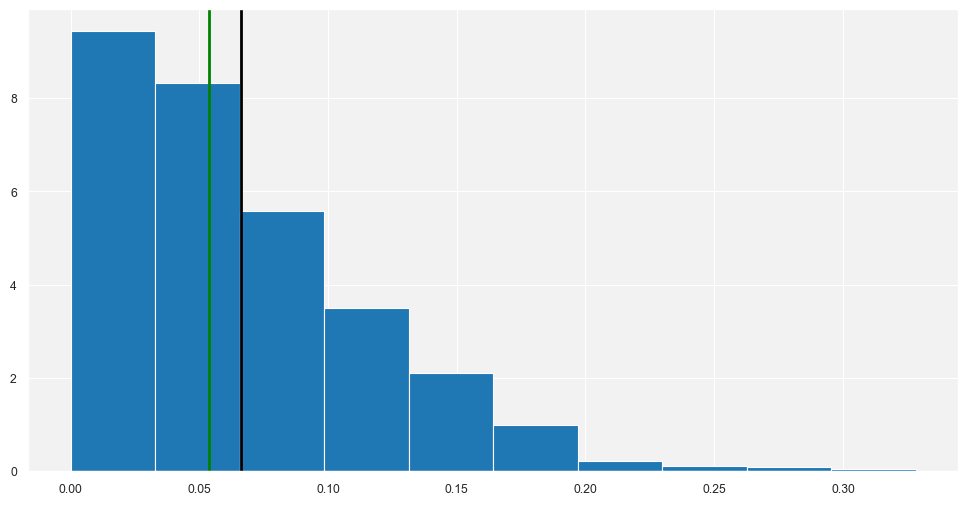

In [12]:
skewness = round(df_train_raw['Item_Visibility'].skew(), 3)
kurtosis = round(df_train_raw['Item_Visibility'].kurt(), 3)

print(f'Skewness : {skewness}')
print(f'Kurtosis : {kurtosis}')

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df_train_raw['Item_Visibility'], bins=10, density=True)

# Linha da mediana
ax.axvline(x = df_train_raw['Item_Visibility'].mean(), color='black', lw=2)
# ax.text(50, 0.007, 'Mean', bbox={'facecolor':'white'})

# # Linha da média
ax.axvline(x = df_train_raw['Item_Visibility'].median(), color='green', lw=2)
# ax.text(11.2, 0.075, 'Median', bbox={'facecolor':'white'})

plt.show()

Nessa variável temos o skewness bastante elevado e positivo, e vemos também uma cauda à direita, o que significa que temos uma assimetria positiva. Já a variável kurtosis indica que temos um historgrama de curtose positiva e leptocúrtico.

<Axes: >

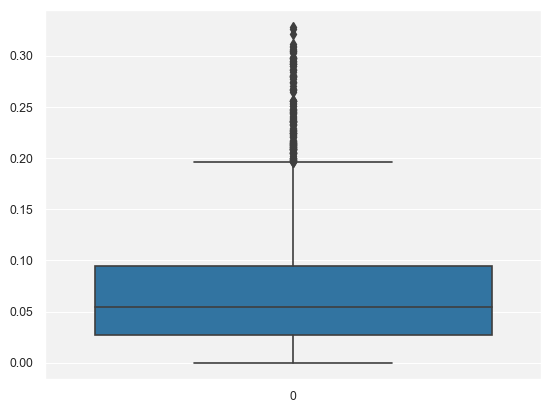

In [13]:
sns.boxplot(df_train_raw['Item_Visibility'])

Neste atributo podemos ver que há outliers. Ou seja, pontos extremos que devemos tratar em um projeto de Machine Learning. Vamos verificar quais são estes dados através do zscore:

**Z Score**

O z-score, também conhecido como escore padrão, é uma medida estatística que indica o número de desvios padrão que um determinado valor está acima ou abaixo da média de uma distribuição12. Ele é calculado subtraindo a média da distribuição do valor observado e dividindo pelo desvio padrão2.

A fórmula matemática para o cálculo do z-score é a seguinte:

$$
z = \frac{x - \mu}{\sigma}
$$

Onde:

* Z é o z-score,
* X é o valor observado,
* μ é a média da população, e
* σ é o desvio padrão da população.


O z-score é usado para identificar outliers em um conjunto de dados. Em estatísticas, um outlier é um ponto de observação que se encontra a uma distância anormal de outros valores em uma amostra aleatória de uma população3. Na maioria dos casos, um limite de 3 ou -3 é usado, ou seja, se o valor do z-score for maior ou menor que 3 ou -3, respectivamente, esse ponto de dados será identificado como outliers3. Isso ajuda a garantir que os resultados da análise sejam mais precisos e confiáveis4.

In [14]:
threshold = 3

df_outlier = df_train_raw.copy()
df_outlier['outlier'] = '0'


z = np.abs(zscore(df_outlier['Item_Visibility']))
indices = list(np.array(np.where(z > threshold)).reshape(-1))

df_outlier.iloc[indices, df_outlier.columns.get_loc('outlier')] = '1'

df_outlier.loc[df_outlier['outlier'] == '1', ['Item_Identifier', 'Item_Visibility', 'outlier']].sort_values(by=['Item_Visibility'], ascending=False)

,Item_Identifier,Item_Visibility,outlier
854,FDU13,0.328391,1
3750,NCZ18,0.325781,1
1805,FDJ56,0.321115,1
7250,FDT24,0.311090,1
2855,NCE31,0.309390,1
...,...,...,...
1560,FDL09,0.224175,1
6179,DRA59,0.223985,1
1291,FDY24,0.223440,1
2445,DRE27,0.222063,1


In [15]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_outlier.loc[df_outlier['outlier'] == '0', 'Item_Visibility'],
    y=df_outlier.loc[df_outlier['outlier'] == '0', 'Item_Visibility'],
    mode='markers',
    name='Inlier'
))

fig.add_trace(go.Scatter(
    x=df_outlier.loc[df_outlier['outlier'] == '1', 'Item_Visibility'],
    y=df_outlier.loc[df_outlier['outlier'] == '1', 'Item_Visibility'],
    mode='markers',
    name='Outlier'  
))

fig.update_layout(
        title=f'<span>Item Visibility outliers using z-score</span>', 
        autosize=False,
        width=800,
        height=600,
        xaxis=dict(title=f'<span>Item_Visibility</span>'),
        yaxis=dict(title=f'<span>Item_Visibility</span>')
    )

fig.show()

Na verdade, os "outliers" são itens que estão bastante expostos nas vitrines do mercado.

---

### 2.3) Item_MRP (Maximum Retail Price (list price) of the product) (numerical)

Skewness : 0.127
Kurtosis : -0.89


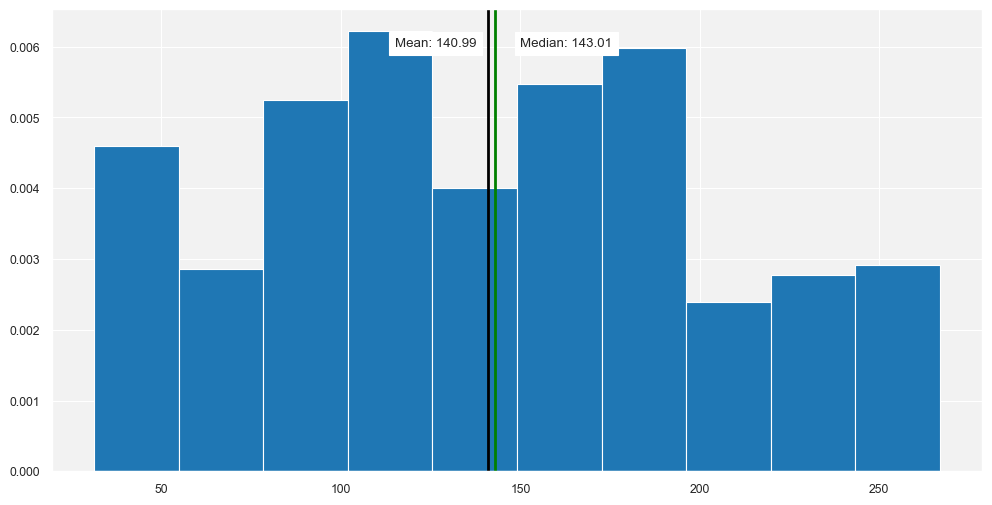

In [16]:
skewness = round(df_train_raw['Item_MRP'].skew(), 3)
kurtosis = round(df_train_raw['Item_MRP'].kurt(), 3)
mean = round(df_train_raw['Item_MRP'].mean(), 2)
median = round(df_train_raw['Item_MRP'].median(), 2)

print(f'Skewness : {skewness}')
print(f'Kurtosis : {kurtosis}')

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df_train_raw['Item_MRP'], bins=10, density=True)

# Linha da mediana
ax.axvline(x = df_train_raw['Item_MRP'].mean(), color='black', lw=2)
ax.text(115, 0.006, f'Mean: {mean}', bbox={'facecolor':'white'})

# Linha da média
ax.axvline(x = df_train_raw['Item_MRP'].median(), color='green', lw=2)
ax.text(150, 0.006, f'Median: {median}', bbox={'facecolor':'white'})

plt.show()

O skewnesse é positivo, então temos uma assimetria à direita. Já a kurtosis é negativa que indica que o histograma é platicúrtico.

<Axes: >

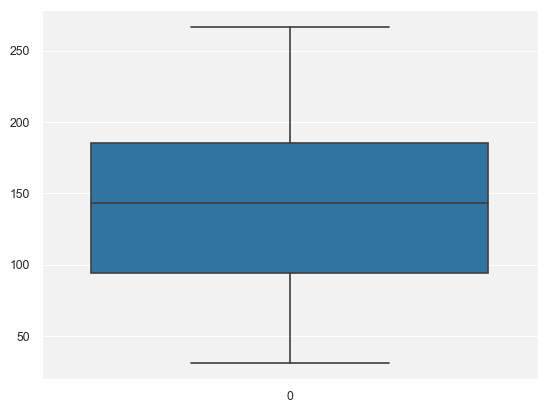

In [17]:
sns.boxplot(df_train_raw['Item_MRP'])

Nesse atributo também não temos dados outliers.

---

### 2.4) Item Outlet Sales (numerical)

Skewness : 1.178
Kurtosis : 1.616
Mean : 2181.29
Median : 1794.33


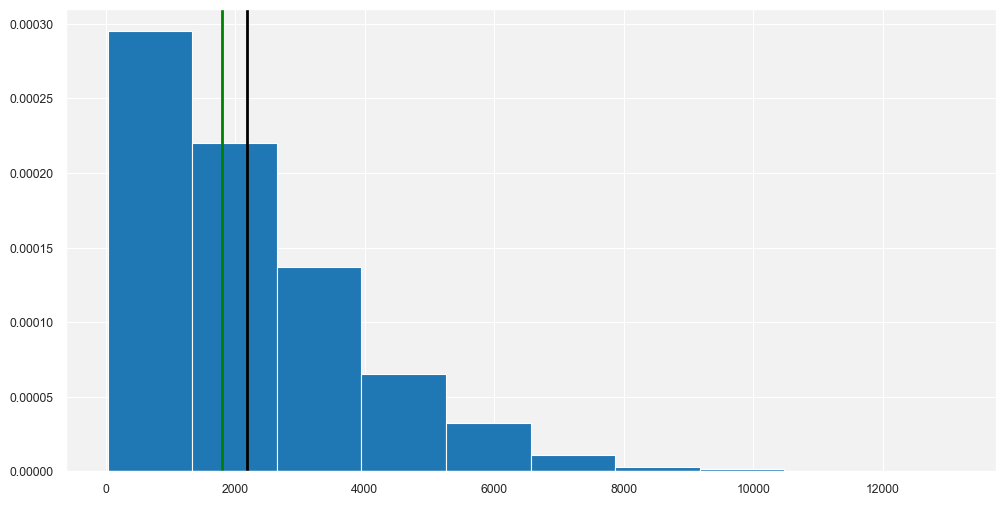

In [18]:
df_train_raw['Item_Outlet_Sales']

skewness = round(df_train_raw['Item_Outlet_Sales'].skew(), 3)
kurtosis = round(df_train_raw['Item_Outlet_Sales'].kurt(), 3)
mean = round(df_train_raw['Item_Outlet_Sales'].mean(), 2)
median = round(df_train_raw['Item_Outlet_Sales'].median(), 2)

print(f'Skewness : {skewness}')
print(f'Kurtosis : {kurtosis}')
print(f'Mean : {mean}')
print(f'Median : {median}')

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df_train_raw['Item_Outlet_Sales'], bins=10, density=True)

# Linha da mediana
ax.axvline(x = df_train_raw['Item_Outlet_Sales'].mean(), color='black', lw=2)

# Linha da média
ax.axvline(x = df_train_raw['Item_Outlet_Sales'].median(), color='green', lw=2)

plt.show()

<Axes: >

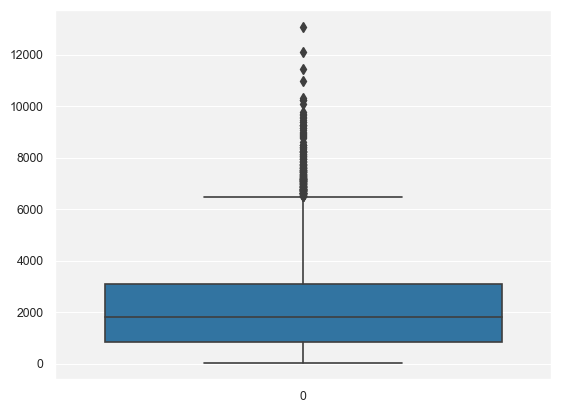

In [19]:
sns.boxplot(df_train_raw['Item_Outlet_Sales'])

In [20]:
threshold = 3

df_outlier = df_train_raw.copy()
df_outlier['outlier'] = '0'


z = np.abs(zscore(df_outlier['Item_Outlet_Sales']))
indices = list(np.array(np.where(z > threshold)).reshape(-1))

df_outlier.iloc[indices, df_outlier.columns.get_loc('outlier')] = '1'

df_outlier.loc[df_outlier['outlier'] == '1', ['Item_Identifier', 'Item_Outlet_Sales', 'outlier']].sort_values(by=['Item_Outlet_Sales'], ascending=False)

,Item_Identifier,Item_Outlet_Sales,outlier
7188,NCE42,13086.9648,1
5223,FDQ19,12117.5600,1
1450,FDZ20,11445.1020,1
4349,FDP33,10993.6896,1
6541,FDI50,10306.5840,1
...,...,...,...
145,FDP16,7370.4060,1
3667,FDP52,7350.4320,1
3407,NCK42,7334.4528,1
7560,FDB56,7322.4684,1


In [21]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_outlier.loc[df_outlier['outlier'] == '0', 'Item_Outlet_Sales'],
    y=df_outlier.loc[df_outlier['outlier'] == '0', 'Item_Outlet_Sales'],
    mode='markers',
    name='Inlier'
))

fig.add_trace(go.Scatter(
    x=df_outlier.loc[df_outlier['outlier'] == '1', 'Item_Outlet_Sales'],
    y=df_outlier.loc[df_outlier['outlier'] == '1', 'Item_Outlet_Sales'],
    mode='markers',
    name='Outlier'  
))

fig.update_layout(
        title=f'<span>Item Visibility outliers using z-score</span>', 
        autosize=False,
        width=800,
        height=600,
        xaxis=dict(title=f'<span>Item_Outlet_Sales</span>'),
        yaxis=dict(title=f'<span>Item_Outlet_Sales</span>')
    )

fig.show()

In [22]:
df_train_raw.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
df_scatter = df_train_raw[['Item_Weight', 'Item_Outlet_Sales']]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_scatter['Item_Weight'],
    y=df_scatter['Item_Outlet_Sales'],
    mode='markers',
    name='Item Weight x Item Outlet Sales'
))

fig.update_layout(
        title=f'<span>Item Weight x Item Outlet Sales</span>', 
        autosize=False,
        width=1200,
        height=400,
        xaxis=dict(title=f'<span>Item Weight</span>'),
        yaxis=dict(title=f'<span> Item Outlet Sales</span>')
    )

fig.show()

In [24]:
df_scatter = df_train_raw[['Item_Visibility', 'Item_Outlet_Sales']]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_scatter['Item_Visibility'],
    y=df_scatter['Item_Outlet_Sales'],
    mode='markers',
    name='Item Weight x Item Outlet Sales'
))

fig.update_layout(
        title=f'<span>Item Visibility x Item Outlet Sales</span>', 
        autosize=False,
        width=1200,
        height=600,
        xaxis=dict(title=f'<span>Item Visibility</span>'),
        yaxis=dict(title=f'<span> Item Outlet Sales</span>')
    )

fig.show()

In [25]:
df_scatter = df_train_raw[['Item_MRP', 'Item_Outlet_Sales']]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_scatter['Item_MRP'],
    y=df_scatter['Item_Outlet_Sales'],
    mode='markers',
    name='Item_MRP x Item Outlet Sales'
))

fig.update_layout(
        title=f'<span>Item MRP x Item Outlet Sales</span>', 
        autosize=False,
        width=1200,
        height=600,
        xaxis=dict(title=f'<span>Item MRP</span>'),
        yaxis=dict(title=f'<span> Item Outlet Sales</span>')
    )

fig.show()

---

### 2.5 ) Item Identifier (categorical)

In [26]:
qty_distincts_items = len(df_train_raw['Item_Identifier'].unique())

print(f"Total quantity of distincts items: {qty_distincts_items}")

Total quantity of distincts items: 1559


In [27]:
df_temp = df_train_raw['Item_Identifier'].value_counts().reset_index()
df_temp.columns = ['Item_Identifier', 'Occurence']

df_temp = df_temp['Occurence'].value_counts().reset_index().sort_values(by=['Occurence'])
df_temp['Occurence'] = df_temp['Occurence'].astype(str)


fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_temp['Occurence'].values,
    y=df_temp['count'].values,
    text=df_temp['count'].values
))

fig.update_layout(
        title=f'<span>Most Occurrencies by Item Identifier</span>', 
        autosize=False,
        width=1200,
        height=600,
        xaxis=dict(title=f'<span>Count of occurrences in the table</span>'),
        yaxis=dict(title=f'<span>Occurrence Items</span>')
    )

fig.show()

Esse barplot, visualmente parece um histograma. Porém, o que ele de fato está mostrando é a quantidade de vezes que um mesmo item aparece na tabela. Por exemplo:
* Na primeira barra: 9 itens aparecem apenas 1 vez;
* Na quarta barra: 234 itens aparecem 4 vezes;

In [28]:
df_item_sales = df_train_raw.copy()
df_item_sales['Item_Identifier_Type'] = df_item_sales['Item_Identifier'] + ' - ' + df_item_sales['Item_Type']

df_item_sales = df_item_sales.groupby(['Item_Identifier_Type'])['Item_Outlet_Sales'].sum().reset_index().sort_values(by=['Item_Outlet_Sales'], ascending=False)
df_item_sales['Item_Outlet_Sales_resumed'] = df_item_sales['Item_Outlet_Sales'].apply(resumeNumber)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_item_sales['Item_Identifier_Type'][0:10].values,
    y=df_item_sales['Item_Outlet_Sales'][0:10].values,
    text=df_item_sales['Item_Outlet_Sales_resumed'][0:10].values
))

fig.update_layout(
        title=f'<span>Quantity Sold by Item (top 10)</span>', 
        autosize=False,
        width=1200,
        height=600,
        xaxis=dict(title=f'<span>Item</span>'),
        yaxis=dict(title=f'<span>Quantity Sold</span>')
    )

fig.show()

**Correlação das variáveis numéricas**

<Axes: >

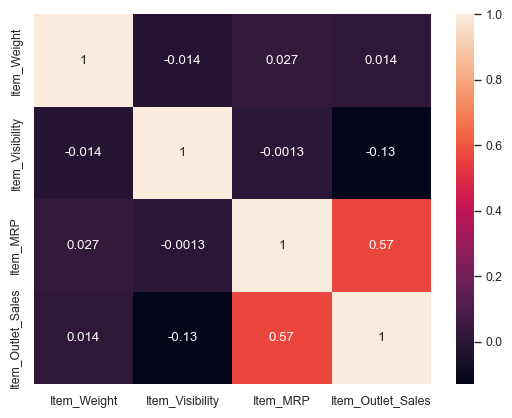

In [29]:
sns.heatmap(df_train_raw[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']].corr(), annot=True)

**Correlaação para variáveis categóricas**

In [30]:
df_corr = df_train_raw.copy()

In [31]:
le = LabelEncoder()
df_corr['Item_Identifier'] = le.fit_transform(df_corr['Item_Identifier'])
df_corr['Item_Fat_Content'] = le.fit_transform(df_corr['Item_Fat_Content'])
df_corr['Item_Type'] = le.fit_transform(df_corr['Item_Type'])
df_corr['Outlet_Identifier'] = le.fit_transform(df_corr['Outlet_Identifier'])
df_corr['Outlet_Size'] = le.fit_transform(df_corr['Outlet_Size'])
df_corr['Outlet_Location_Type'] = le.fit_transform(df_corr['Outlet_Location_Type'])
df_corr['Outlet_Type'] = le.fit_transform(df_corr['Outlet_Type'])

<Axes: >

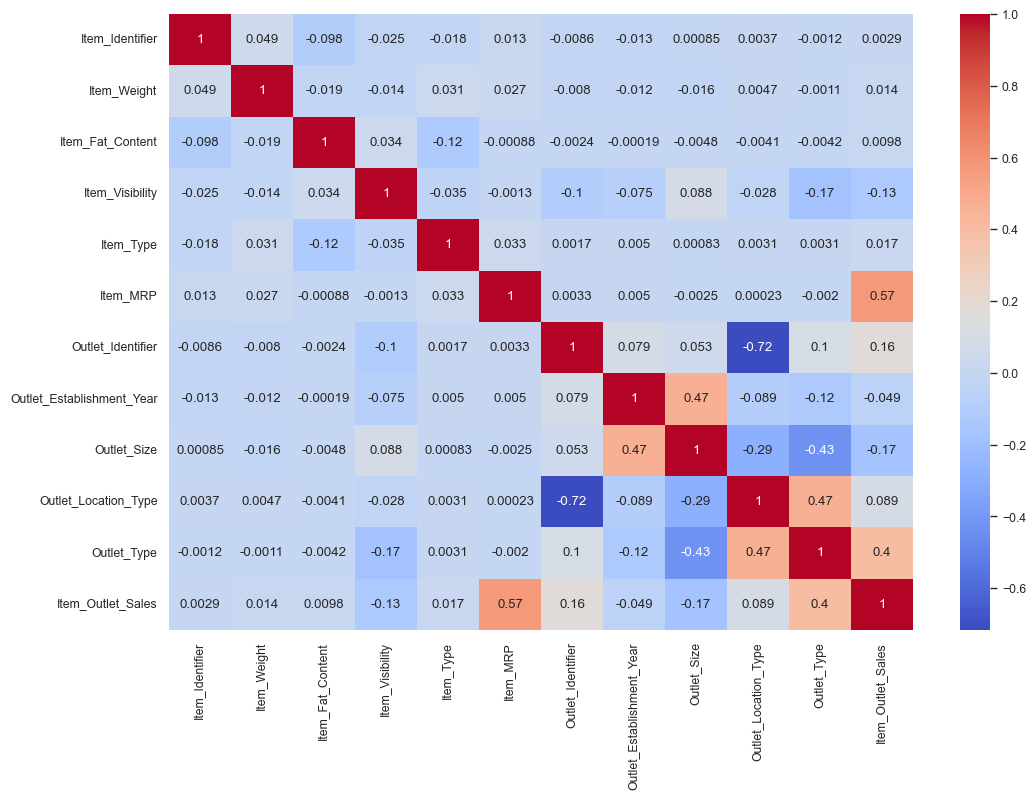

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')

---

### 2.6) Item Fat Content (categorical)

Se o produto tem baixo teor de gordura ou não.

In [33]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_train_raw['Item_Fat_Content'].value_counts().index,
    y=df_train_raw['Item_Fat_Content'].value_counts().values,
    text=df_train_raw['Item_Fat_Content'].value_counts().values
))

Aqui temos 5 valores distintos para a categoria Item Fat. Porém, podemos inferir algumas coisas:
* **Q**. O item deve ser Low Fat ou Regular. Então o que são LF e reg?
* **A**. Ora, pelo senso lógico LF = Low Fat e reg = Regular.
* **Q**. Por que Low Fat e low fat estão em categorias diferentes?
* **A**. Simples. Low Fat tem suas iniciais em maiúsculo enquanto que low fat têm suas iniciais todas em minúsculos. Isso o classifica em classes diferentes.

---

### 2.7) Item Type (categorical)

In [34]:
df_occurencies = df_train_raw['Item_Type'].value_counts().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_occurencies['Item_Type'],
    y=df_occurencies['count'],
    text=df_occurencies['count'],
    marker={'color': '#F20505'},
))

fig.update_layout(
        title=f'<span>Most Occurrencies by Item Type</span>', 
        autosize=False,
        width=1200,
        height=600,
        xaxis=dict(title=f'<span>Item Type</span>'),
        yaxis=dict(title=f'<span>Occurrence</span>')
    )

fig.show()

In [35]:
df_sales = df_train_raw.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().reset_index().sort_values(by=['Item_Outlet_Sales'], ascending=False)
df_sales['Item_Outlet_Sales_resumed'] = df_sales['Item_Outlet_Sales'].apply(resumeNumber)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_sales['Item_Type'],
    y=df_sales['Item_Outlet_Sales'],
    text=df_sales['Item_Outlet_Sales_resumed'],
    marker={'color': '#F20505'},
))

fig.update_layout(
        title=f'<span>Most Sales by Item Type</span>', 
        autosize=False,
        width=1200,
        height=600,
        xaxis=dict(title=f'<span>Item Type</span>'),
        yaxis=dict(title=f'<span>Quantity Sold</span>')
    )

fig.show()

---

### 2.8) Outlet Identifier (categorical)

In [36]:
df_occurencies = df_train_raw.copy()
df_occurencies['Outlet_Year'] = df_occurencies['Outlet_Identifier'] + '-' + df_occurencies['Outlet_Establishment_Year'].astype(str)

df_occurencies = df_occurencies['Outlet_Year'].value_counts().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_occurencies['Outlet_Year'],
    y=df_occurencies['count'],
    text=df_occurencies['count'],
    marker={'color': '#9902FF'},
))

fig.update_layout(
        title=f'<span>Most Occurrencies by Outlet Type</span>', 
        autosize=False,
        width=1200,
        height=600,
        xaxis=dict(title=f'<span>Outlet Identifier</span>'),
        yaxis=dict(title=f'<span>Occurrence</span>')
    )

fig.show()

In [37]:
df_occurencies = df_train_raw.copy()
df_occurencies['Outlet_Year'] = df_occurencies['Outlet_Identifier'] + '-' + df_occurencies['Outlet_Establishment_Year'].astype(str)

df_occurencies = df_occurencies.groupby(['Outlet_Year'], as_index=False)['Item_Outlet_Sales'].sum()
df_occurencies['Item_Outlet_Sales_Resumed'] = df_occurencies['Item_Outlet_Sales'].apply(resumeNumber)
df_occurencies = df_occurencies.sort_values(by=['Item_Outlet_Sales'], ascending=False)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_occurencies['Outlet_Year'],
    y=df_occurencies['Item_Outlet_Sales'],
    text=df_occurencies['Item_Outlet_Sales_Resumed'],
    marker={'color': '#9902FF'},
))

fig.update_layout(
        title=f'<span>Most Sales by Store</span>', 
        autosize=False,
        width=1200,
        height=600,
        xaxis=dict(title=f'<span>Store Identifier</span>'),
        yaxis=dict(title=f'<span>Sales</span>')
    )

fig.show()


---

### 2.9) Outlet Establishment Year (numerical)

In [50]:
print('How many rows by year of opening of each store')

display(df_train_raw['Outlet_Establishment_Year'].value_counts().sort_index())

How many rows by year of opening of each store


Outlet_Establishment_Year
1985    1463
1987     932
1997     930
1998     555
1999     930
2002     929
2004     930
2007     926
2009     928
Name: count, dtype: int64

In [48]:
df_year = df_train_raw[['Outlet_Identifier', 'Outlet_Establishment_Year']]
df_year['Outlet_Year_Identifier'] = df_year['Outlet_Establishment_Year'].astype(str) + ' - ' + df_year['Outlet_Identifier']

print('Year of Opening of Each Store')
display(sorted(df_year['Outlet_Year_Identifier'].unique()))


Year of Opening of Each Store


['1985 - OUT019',
 '1985 - OUT027',
 '1987 - OUT013',
 '1997 - OUT046',
 '1998 - OUT010',
 '1999 - OUT049',
 '2002 - OUT045',
 '2004 - OUT035',
 '2007 - OUT017',
 '2009 - OUT018']

In [51]:
del df_year

---

### 2.10) Outlet Size (categorical)

In [52]:
df_train_raw.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [56]:
percent = round(df_train_raw['Outlet_Size'].isnull().sum() / len(df_train_raw), 4) * 100
print(f'Percent of null values of Outlet Size: {percent}%')

Percent of null values of Outlet Size: 28.28%


In [60]:
df_train_raw.loc[df_train_raw['Outlet_Size'].isnull(), ['Outlet_Identifier']].value_counts()

Outlet_Identifier
OUT045               929
OUT017               926
OUT010               555
Name: count, dtype: int64

In [63]:
df_outlet_size = df_train_raw.loc[df_train_raw['Outlet_Identifier'].isin(['OUT045', 'OUT017', 'OUT010'])]

df_outlet_size['Outlet_Size'].value_counts()

Series([], Name: count, dtype: int64)

* Conclusão:
    * Todos os registros sobre outlet size para essas lojas específicas estão nulos.

---

### 2.11) Outlet Location Type (categorical)

---

### 2.10) Outlet Type (categorical)

## 3) Missing Values

In [ ]:
# Gera a visualização

# Dataframe
df_nan = pd.DataFrame(df_train_raw.isna().sum())

# Plot - Mapa de Valores Ausentes
if df_train_raw.isna().any(axis = None):
    missingno.matrix(df_train_raw[df_nan[df_nan[0]>0].index])
    plt.show()

In [ ]:
# Gera a visualização

# Dataframe
df_nan = pd.DataFrame(df_woe.isna().sum())

# Plot - Mapa de Valores Ausentes
if df_woe.isna().any(axis = None):
    missingno.matrix(df_woe[df_nan[df_nan[0]>0].index])
    plt.show()